## Arctic Heat

**AXCTD and XBT Profiles**

Purpose: import clean and plot profiles

In [49]:
import pandas as pd
import os
import datetime

In [9]:
source_dir = '/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if 'dta' in f]


### Data Ingestion and data summary/statistics

A few lines to list and read the .iwg files into a dictionary of pandas dataframes.

The original .dta files have header as follows:   

```
Probe Type = AXBT     
       Date = 2018/05/26
       Time = 00:29:35.620
 
    Time     Depth    Frequency    (C)       (F) 
```

In [127]:
dfs = {}
for i,filename in enumerate(source_file):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        print("{} failed to process time".format(filename))
        continue        

/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00000.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00001.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00002.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00003.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180525/log00004.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00000.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00001.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AXBT_Data/AXBT_20180527/log00002.dta
/Volumes/WDC_internal/Users/bell/ecoraid/2018/Additional_FieldData/ArcticHeat/AX

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

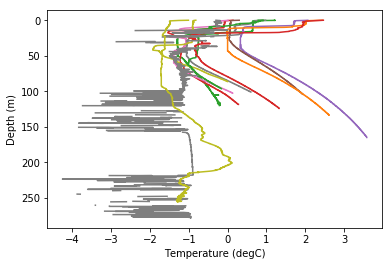

In [137]:
for ds, df in dfs.items():
    try:
        plt.plot(df['(C)'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
    except:
        pass
    
ax = plt.gca()
ax.invert_yaxis()

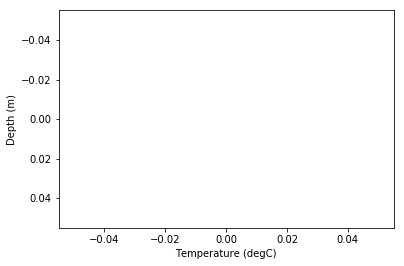

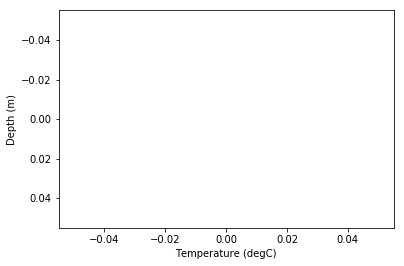

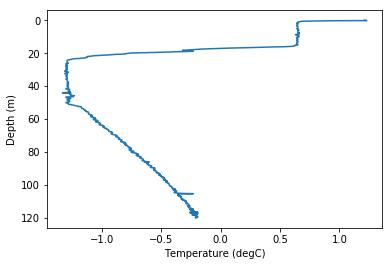

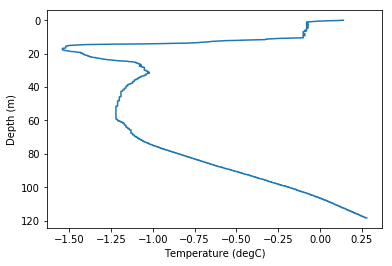

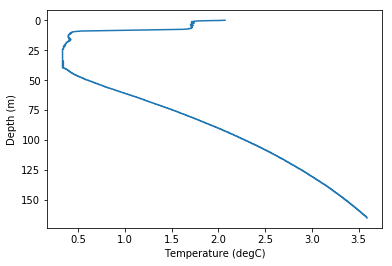

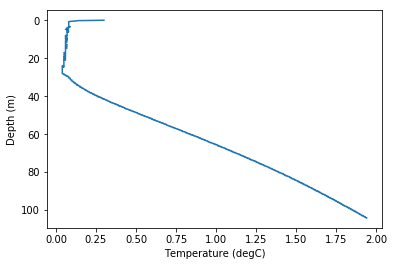

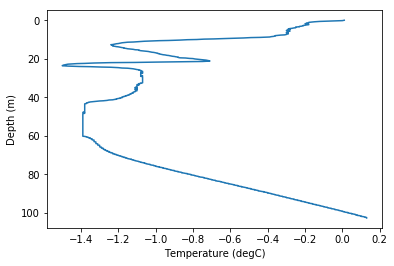

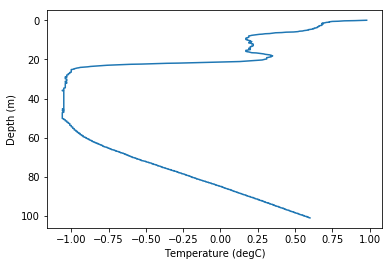

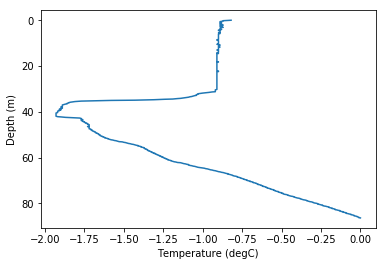

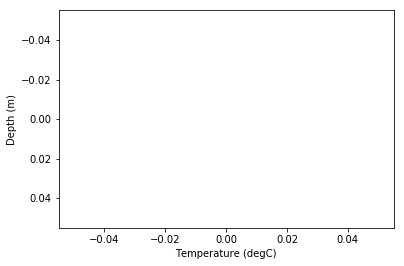

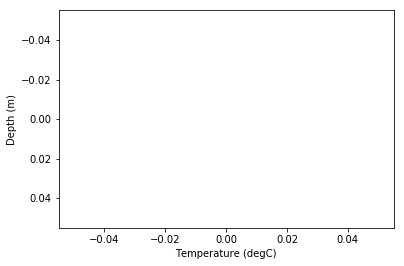

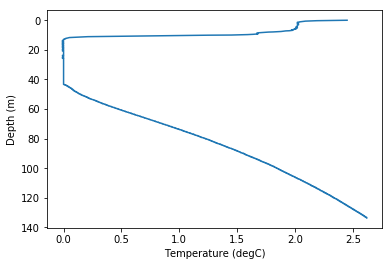

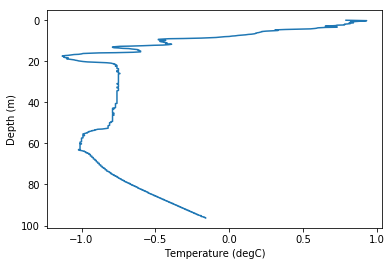

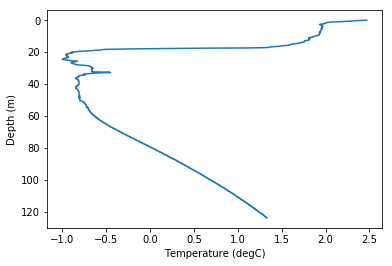

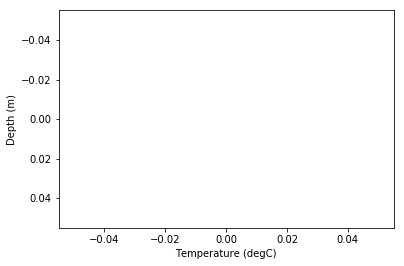

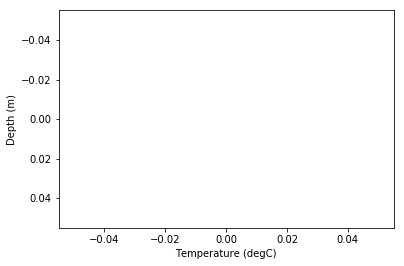

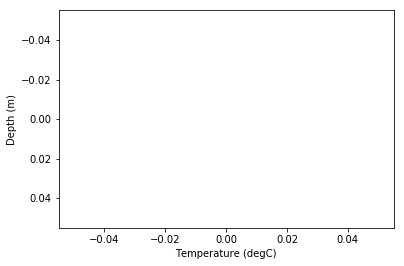

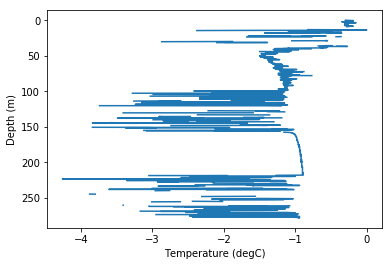

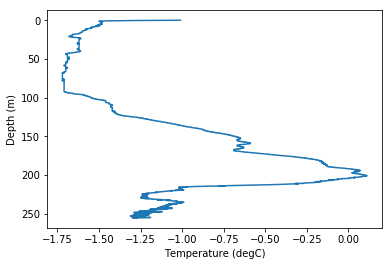

In [139]:
for ds, df in dfs.items():
    fig = plt.figure()
    try:
        plt.plot(df['(C)'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
        ax = plt.gca()
        ax.invert_yaxis()
    except:
        pass
    


19